# The Sales Analysis

### Import important libraries

In [1]:
import pandas as pd 
import os

### T1 : Merging all the dataset in one csv

In [2]:
files=[file for file in os.listdir('./Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index=False)

#### Read the merger dataframe

In [3]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop rows of NaN

In [4]:
all_data=all_data.dropna()
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016"
97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215"
98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215"
99,176652,LG Washing Machine,1,600.0,04/09/19 20:04,"502 14th St, New York City, NY 10001"


#### Find 'Or' and Delete it

In [5]:
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert the column to required datatype

In [6]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) # Make float

### Add required columns 

### T2 : Add Month Column

In [7]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### T3 : Add sales column

In [8]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### T4 :Add a city column 

In [9]:
# Let's use apply
def city(address):
    return address.split(',')[1]
def state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x:f"{city(x)}({state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


#### Ques 1 : What was the best month for sales? how much was earned that month?

In [10]:
results=all_data.groupby('Month')[['Quantity Ordered','Price Each','Sales']].sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


In [11]:
# Sales column Data converted in terms of Millions 
def millions(y,pos):
    return '%1.1fM'%(y*1e-6)

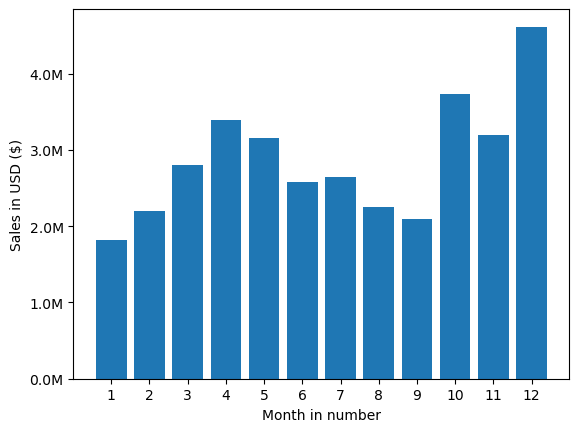

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
#Formatting the y-axis to show values in millons
formatter=FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month in number')
plt.show()

#### Ques2 : Which city had the highest sales ?

In [13]:
results=all_data.groupby('City')[['Quantity Ordered','Price Each','Sales']].sum()
results.head(10)

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta(GA),16602,2779908.20,2795498.58
Austin(TX),11153,1809873.61,1819581.75
Boston(MA),22528,3637409.77,3661642.01
Dallas(TX),16730,2752627.82,2767975.40
Los Angeles(CA),33289,5421435.23,5452570.80
New York City(NY),27932,4635370.83,4664317.43
Portland(ME),2750,447189.25,449758.27
Portland(OR),11303,1860558.22,1870732.34
San Francisco(CA),50239,8211461.74,8262203.91


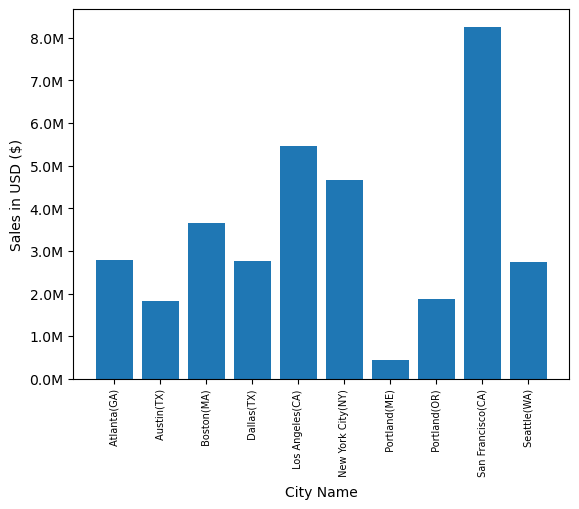

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
#Formatting the y-axis to show values in millons
formatter=FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

cities=[city for city, df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=7)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### Ques3: What time should we display advertisements to maximize   likehood of customer's buying product ?

In [23]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


In [16]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


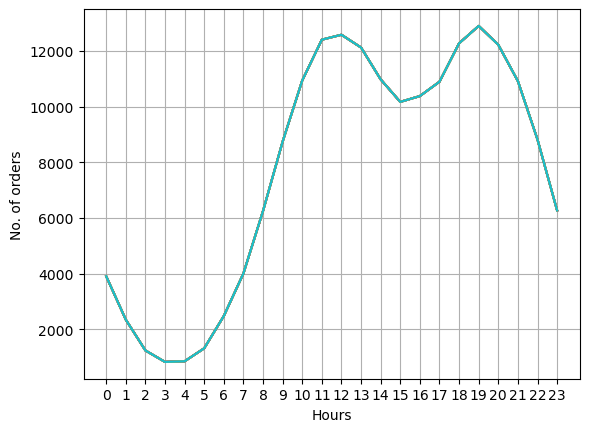

In [29]:
hours=[hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("No. of orders")
plt.grid()
plt.show()


#### Ques:4 What products are most often sold together?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# Create the 'Grouped' column
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Select and drop duplicates
df = df[['Order ID', 'Grouped']].drop_duplicates()

# Display the first 100 rows
df.head(100)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [18]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Ques5: What product sold the most? Why do you think it sold the most?

In [58]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


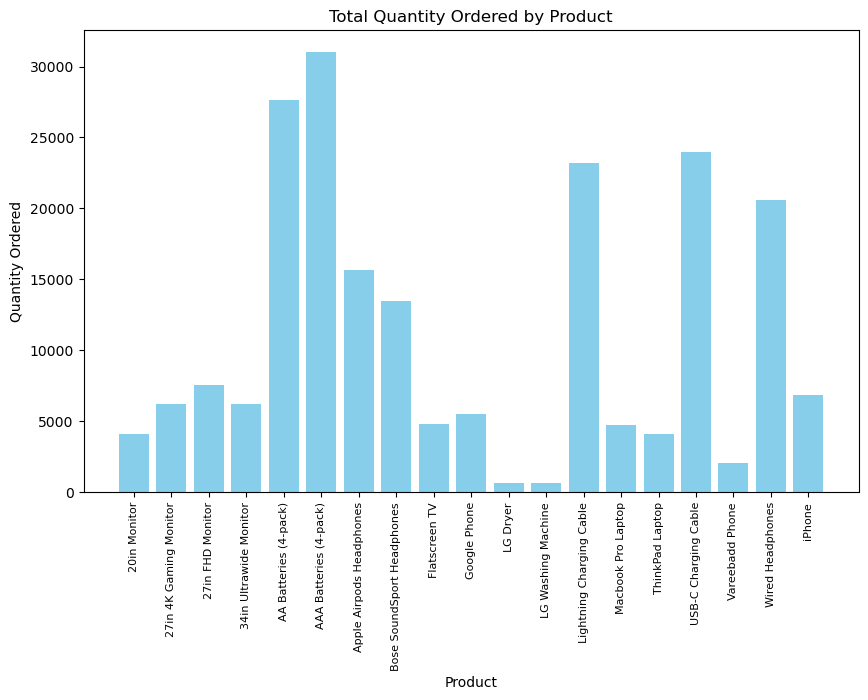

In [19]:
# Group by product and sum the quantities ordered
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()

# Get the products and quantities for plotting
products = product_sales.index
quantity_ordered = product_sales.values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(products, quantity_ordered, color='skyblue')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Total Quantity Ordered by Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [20]:
# Ensure 'Quantity Ordered' and 'Price Each' columns are numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Drop rows with NaN values in 'Quantity Ordered' or 'Price Each'
all_data.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)


Average Price of Each Product:
Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


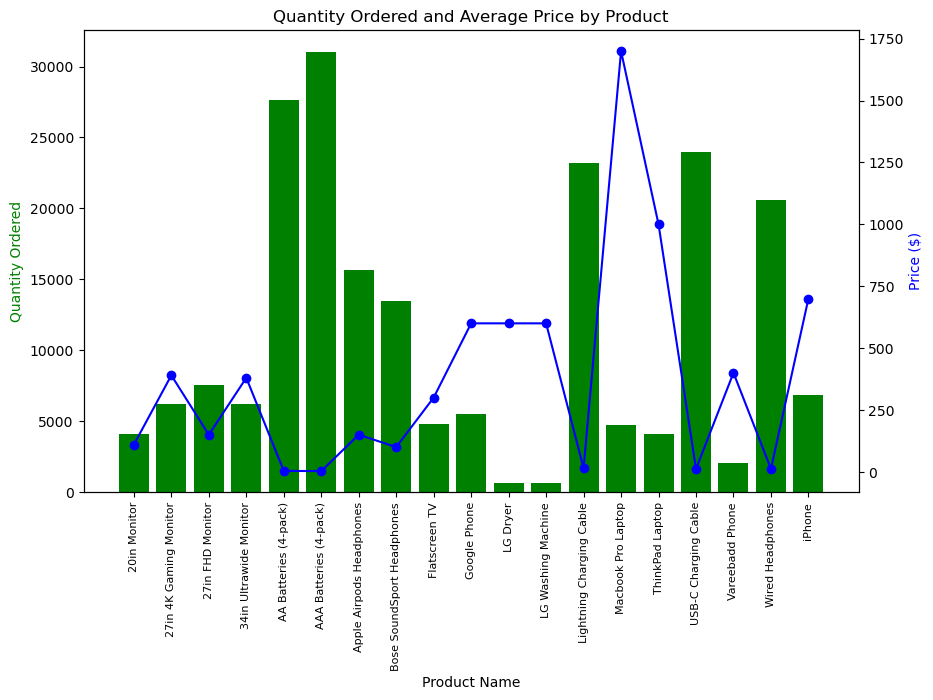

In [21]:
# Group by product and calculate the mean price
prices = all_data.groupby('Product')['Price Each'].mean()
print("Average Price of Each Product:")
print(prices)

# Get the products and quantities for plotting
products = product_sales.index
quantity_ordered = product_sales.values

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, 'b-', marker='o')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='green')
ax2.set_ylabel('Price ($)', color='b')

# Set x-ticks and labels
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.title('Quantity Ordered and Average Price by Product')
plt.show()
